In [5]:
import numpy as np
import random
from numpy.random import rand
import matplotlib
import matplotlib.pyplot as plt

## Utilities

### Initialise X0

In [36]:
def state_X0(N):
  state = np.zeros((2,N,N))
  state[0,:,:] = 1
  state[1,:,:] = -1
  return(state)

In [49]:
state = state_X0(3)
print(state)

[[[ 1.  1.  1.]
  [ 1.  1.  1.]
  [ 1.  1.  1.]]

 [[-1. -1. -1.]
  [-1. -1. -1.]
  [-1. -1. -1.]]]


### Calculate energy difference of flipping the [i,j] vertex

In [37]:
def deltaE(i,j,state):
    N = state.shape[1]
    top = 1
    bottom = 1
    left = 1
    right = 1
    if i != 0:
      top = state[i - 1, j]
    if i != N-1:
      bottom = state[i + 1, j]
    if j != 0:
      left = state[i, j - 1]
    if j != N-1:
      right = state[i, j + 1]
    energy = 2*state[i,j]*np.sum([top,bottom,left,right])
    return energy

### Update State

In [38]:
def updateState(t, state, U, T):
  B = 1/T
  E = np.zeros(3)
  i = int(U[1,int(-t)-1]) - 1
  j = int(U[2,int(-t)-1]) - 1
  for h in range(2):
    E[h] = deltaE(i,j,state[h,:,:])
    u = U[0, int(-t)]
    # print("U=",u)
    if state[h,i,j] == 1:
      u = 1 - u
    # print("val = ", 0.5 * (B * E[h]))
    if u < 0.5 * (1 - np.tanh(0.5 * B * E[h])):  # Inverse Transform for discrete RVs
      state[h, i, j] = -state[h, i, j] # flip if probability allows
    else:
      state[h, i, j] = state[h, i, j] # no flip
  return state


In [9]:
def runChain(t, state, U, T):
    while t < 0:
        state = updateState(t, state, U,T)
        t += 1
    return state

### Run Propp-Wilson

In [33]:
# Uniform randoms of size time steps
def generateRandoms(N, M):
  U = np.random.rand(3,M) # Random numbers to determine transition probabilities
  U[1:,:] = np.ceil(N*U[1:,:]) # Random numbers to pick the location in the grid to be flipped
  return U

# Generate a vector of times
def StartingTimes(k):
  M = np.zeros(k)
  M[0] = 1
  for i in range(1,k):
    M[i] = 2*M[i-1]
  return M

def runPW(N,k,T):
  M = StartingTimes(k) # Bunch of starting times
  M = M.astype(int) # Changing it from floats to integers to avoid some Python stuff
  U = generateRandoms(N,1) # Randoms going to be used for the simulation
  state = state_X0(N) # Initial state
  m = 2
  prev_state = state_X0(N)
  count = 0
  while np.any(state[0, :, :] != state[1, :, :]):
    # concat more randoms as we increase the time
    U_more = generateRandoms(N, int(M[m-1] - M[m-2]))
    U = np.concatenate((U, U_more),axis=1)
    # Magnetization is a measure of how close we are getting to convergence
    magnetization = np.sum(np.sum(state[0,:,:])-np.sum(state[1,:,:]))
    print("magnetization= ",magnetization, "iteration= ", m-1)
    # Run each of the chains for M[m-1] steps, - 1 is because indexing in python is from 0
    state = runChain(-int(M[m-1]-1), state, U, T )
    # Change starting time for the next iteration
    m += 1
    # Check for convergence
    if np.any( state[0,:,:] != state[1,:,:] ):
      prev_state[1,:,:] =   state[1,:,:]
    count += 1
  return state[0,:,:], prev_state[1,:,:]

In [43]:
state, before = runPW(10,20,2)

magnetization=  200.0 iteration=  1
magnetization=  200.0 iteration=  2
magnetization=  200.0 iteration=  3
magnetization=  200.0 iteration=  4
magnetization=  200.0 iteration=  5
magnetization=  194.0 iteration=  6
magnetization=  190.0 iteration=  7
magnetization=  186.0 iteration=  8
magnetization=  170.0 iteration=  9
magnetization=  144.0 iteration=  10
magnetization=  108.0 iteration=  11
magnetization=  36.0 iteration=  12


### Code to plot the state in a cool format
borrowed from https://github.com/sefeoglu/propp-wilson_Ising_Model/blob/master/ProppWilsonAlgorithm_for_IsingModel%20_MCM.ipynb

In [44]:
def Graph(state, T):
    S = state.shape[1]  # Takes the size of the matrix
    print("Plotting!")
    for i in range(S):
        for j in range(S):
            if state[i][j] == 1:  # Graphs a red + if the matrix entry is positive
                plt.scatter(j, S - 1 - i, c='r', marker=',', )#s=(150,))
            elif state[i][j] == -1:  # Graphs a blue minus is the matrix is negative
                plt.scatter(j, S - 1 - i, c='b', marker=',', )#s=(150,))
    plt.title("Sample, T=%d" % (T) )
    print("Done!")
    plt.show()

Plotting!
Done!


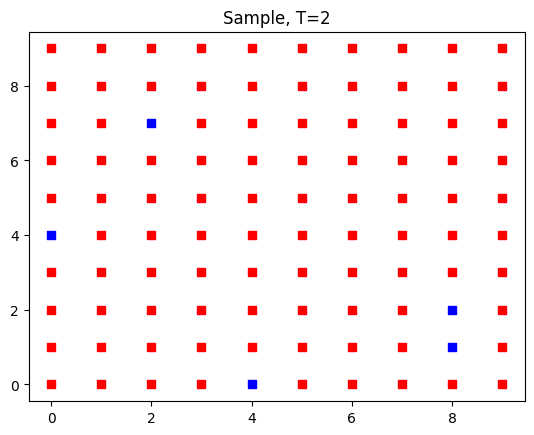

In [45]:
Graph(state,2)

Plotting!
Done!


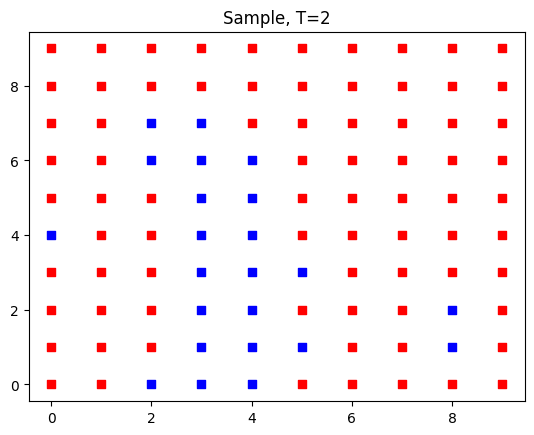

In [46]:
Graph(before,2)

In [47]:
before

array([[ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.],
       [ 1.,  1., -1., -1.,  1.,  1.,  1.,  1.,  1.,  1.],
       [ 1.,  1., -1., -1., -1.,  1.,  1.,  1.,  1.,  1.],
       [ 1.,  1.,  1., -1., -1.,  1.,  1.,  1.,  1.,  1.],
       [-1.,  1.,  1., -1., -1.,  1.,  1.,  1.,  1.,  1.],
       [ 1.,  1.,  1., -1., -1., -1.,  1.,  1.,  1.,  1.],
       [ 1.,  1.,  1., -1., -1.,  1.,  1.,  1., -1.,  1.],
       [ 1.,  1.,  1., -1., -1., -1.,  1.,  1., -1.,  1.],
       [ 1.,  1., -1., -1., -1.,  1.,  1.,  1.,  1.,  1.]])

In [48]:
state

array([[ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.],
       [ 1.,  1., -1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.],
       [-1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1., -1.,  1.],
       [ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1., -1.,  1.],
       [ 1.,  1.,  1.,  1., -1.,  1.,  1.,  1.,  1.,  1.]])

# Experiments

### Changing N

magnetization=  50.0 iteration=  1
magnetization=  48.0 iteration=  2
magnetization=  48.0 iteration=  3
magnetization=  46.0 iteration=  4
magnetization=  40.0 iteration=  5
magnetization=  34.0 iteration=  6
magnetization=  30.0 iteration=  7
magnetization=  20.0 iteration=  8
Plotting!
Done!


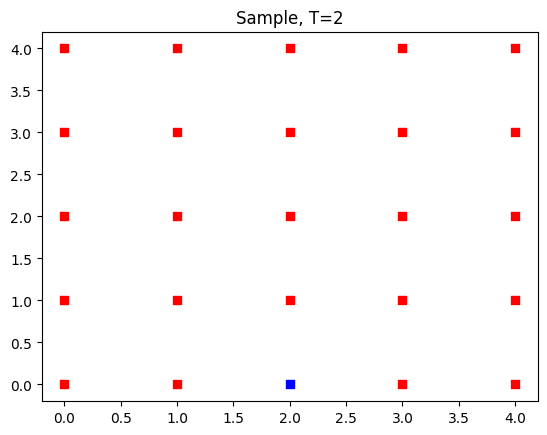

In [52]:
state, before = runPW(5,20,2)
Graph(state,2)

magnetization=  800.0 iteration=  1
magnetization=  800.0 iteration=  2
magnetization=  800.0 iteration=  3
magnetization=  800.0 iteration=  4
magnetization=  800.0 iteration=  5
magnetization=  796.0 iteration=  6
magnetization=  792.0 iteration=  7
magnetization=  786.0 iteration=  8
magnetization=  770.0 iteration=  9
magnetization=  740.0 iteration=  10
magnetization=  706.0 iteration=  11
magnetization=  626.0 iteration=  12
magnetization=  454.0 iteration=  13
magnetization=  348.0 iteration=  14
magnetization=  250.0 iteration=  15
Plotting!
Done!


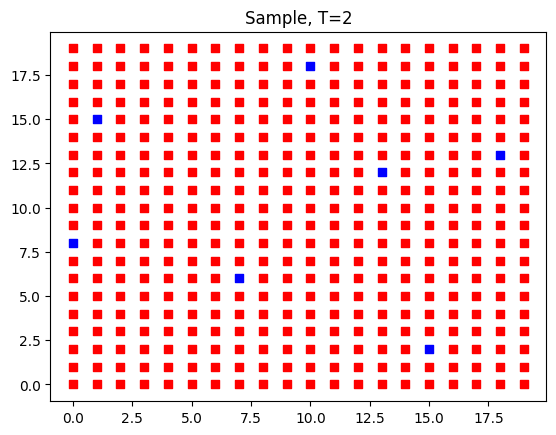

In [54]:
state, before = runPW(20,20,2)
Graph(state,2)

### Changing Temperature

magnetization=  200.0 iteration=  1
magnetization=  200.0 iteration=  2
magnetization=  196.0 iteration=  3
magnetization=  190.0 iteration=  4
magnetization=  180.0 iteration=  5
magnetization=  174.0 iteration=  6
magnetization=  158.0 iteration=  7
magnetization=  110.0 iteration=  8
magnetization=  60.0 iteration=  9
magnetization=  10.0 iteration=  10
Plotting!
Done!


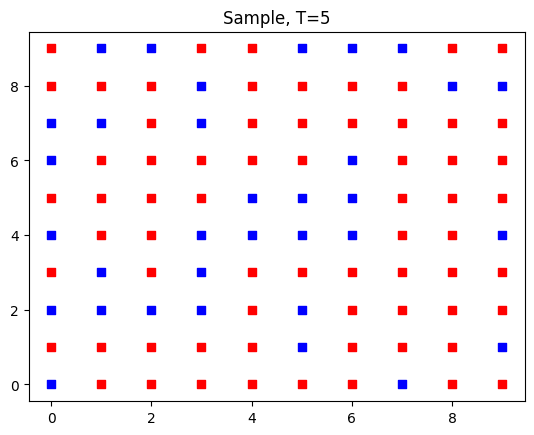

In [55]:
T = 5
state, before = runPW(10,20,T)
Graph(state, T)

magnetization=  200.0 iteration=  1
magnetization=  198.0 iteration=  2
magnetization=  196.0 iteration=  3
magnetization=  190.0 iteration=  4
magnetization=  178.0 iteration=  5
magnetization=  150.0 iteration=  6
magnetization=  114.0 iteration=  7
magnetization=  76.0 iteration=  8
magnetization=  26.0 iteration=  9
Plotting!
Done!


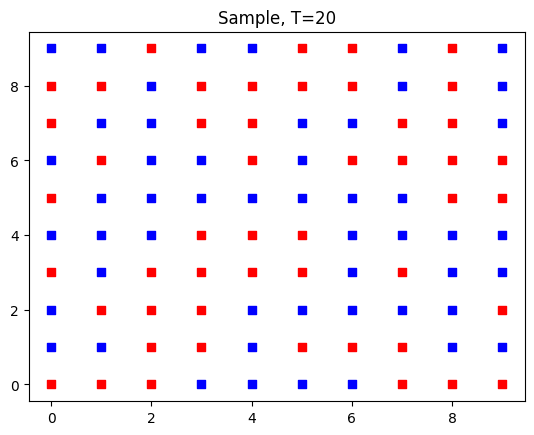

In [57]:
T = 20
state, before = runPW(10,20,T)
Graph(state, T)